In [61]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.colors import ListedColormap

%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [63]:
df=pd.read_csv("D:\\DATA SCIENCE\\ALGORITHMS\\MACHINE LEARNING ALGORITHMS\\Social_Network_Ads logistic regression.csv")

In [65]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [67]:
df.shape

(400, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [85]:
df.describe().round(2)

,User ID,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00,400.00
mean,15691539.76,37.66,69742.50,0.36
std,71658.32,10.48,34096.96,0.48
min,15566689.00,18.00,15000.00,0.00
25%,15626763.75,29.75,43000.00,0.00
50%,15694341.50,37.00,70000.00,0.00
75%,15750363.00,46.00,88000.00,1.00
max,15815236.00,60.00,150000.00,1.00


In [13]:
df.drop(columns='User ID',axis=1,inplace=True) 

In [15]:
df.head() 

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Text(0.5, 1.0, 'Age Distribution')

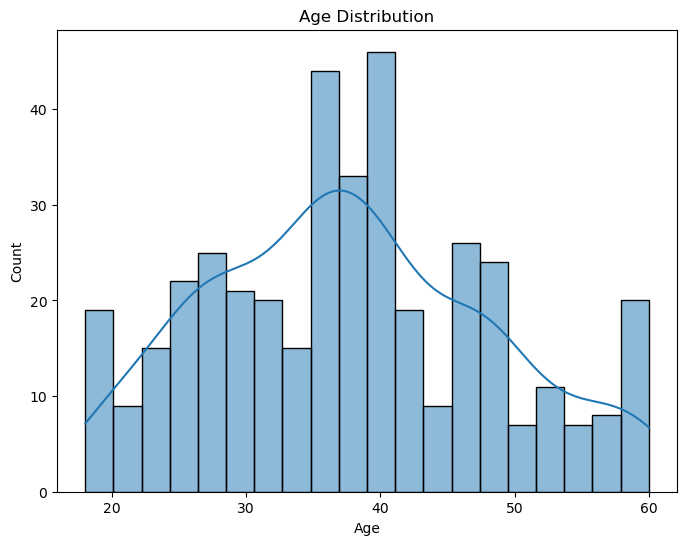

In [95]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, edgecolor='black',kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Estimated Salary Distribution')

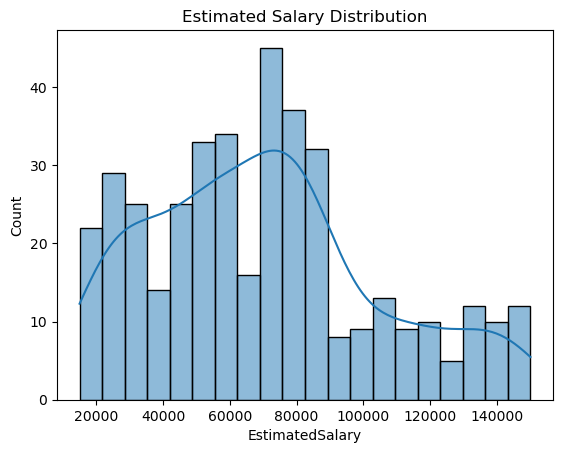

In [97]:
sns.histplot(df['EstimatedSalary'], bins=20 , edgecolor='black',kde=True)
plt.title('Estimated Salary Distribution')

Text(0.5, 1.0, 'Gender Distribution')

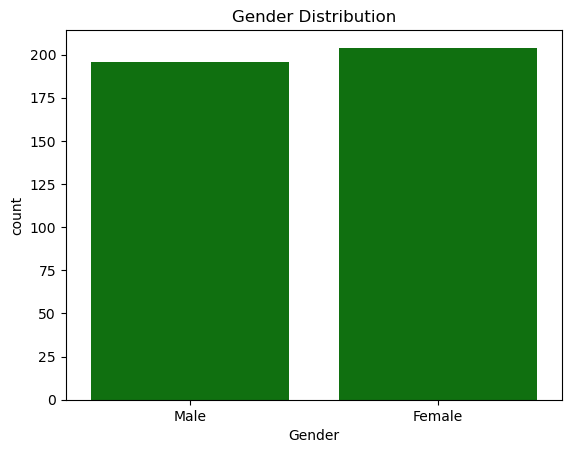

In [33]:
sns.countplot(x = "Gender", data= df,color='green')
plt.title('Gender Distribution')

In [25]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Female    204
Male      196
Name: count, dtype: int64


Text(0.5, 1.0, 'Purchase Distribution')

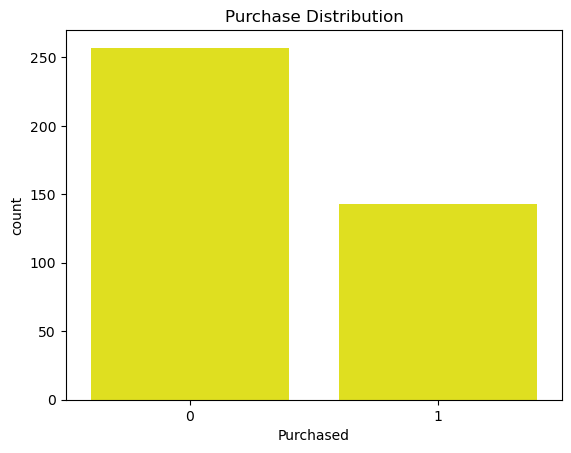

In [31]:
sns.countplot(x= "Purchased", data = df,color='yellow')
plt.title('Purchase Distribution')

In [35]:
Purchased_counts = df['Purchased'].value_counts()
print(Purchased_counts)

Purchased
0    257
1    143
Name: count, dtype: int64


In [37]:
df.drop(columns='Gender',axis=1,inplace=True)  

In [39]:
df.head() 

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [43]:
X = df.drop("Purchased", axis=1).values
y = df['Purchased'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state= 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((280, 2), (280,), (120, 2), (120,))

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression  

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  

LogisticRegression()

In [51]:
y_pred = log_reg.predict(X_test)
print(y_pred) 

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 0 0 0 0 0]


In [53]:
y_pred = classifier.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(result)

     Actual  Predicted
0         0          0
1         1          1
2         0          0
3         1          1
4         0          0
..      ...        ...
115       0          0
116       0          0
117       1          0
118       0          0
119       0          0

[120 rows x 2 columns]


In [113]:
X_train.shape

(280, 2)

In [115]:
X_test.shape

(120, 2)

In [1]:
#yplt=y_test.values.reshape(-1,1)
#ypltt=y_pred.values.reshape(-1,1)

In [3]:
"""plt.figure(figsize=(8, 6))
plt.scatter(Xplt,Xpltt,edgecolor='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')"""

"plt.figure(figsize=(8, 6))\nplt.scatter(Xplt,Xpltt,edgecolor='black')\nplt.xlabel('Actual')\nplt.ylabel('Predicted')"

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[71,  2],
       [16, 31]], dtype=int64)

<Axes: >

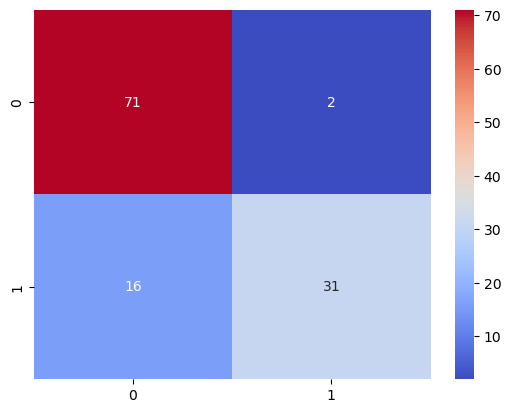

In [57]:
sns.heatmap(cm, annot=True, cmap = "coolwarm")

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120



Text(0, 0.5, 'Purchased')

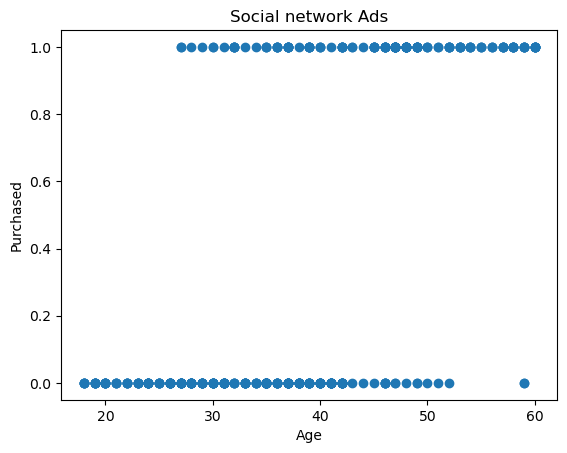

In [11]:
plt.scatter(df[['Age']],df.Purchased)
plt.title("Social network Ads")
plt.xlabel("Age")
plt.ylabel("Purchased")

In [12]:
X=df['Age'].values.reshape(-1,1)
y=df['Purchased'].values.reshape(-1,1)

In [13]:
#initalize and run the model
logreg=LogisticRegression()
logreg.fit(X,y)

C:\Users\91846\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
print(logreg.predict([[20]]))

[0]


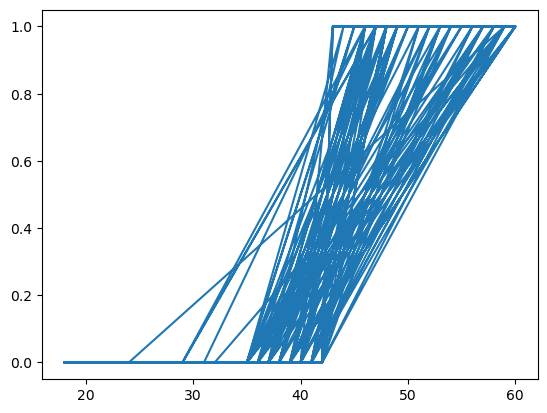

In [15]:
plt.plot(df[['Age']],logreg.predict(X))
#plt.show()